# Doctor's Consultancy Fees

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Importing important Libraries

In [74]:
df=pd.read_csv('Doctor_fees.csv')
df               

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS- MD - Homeopathy,24 years experience,100%,Kakkanad- Ernakulam,Homeopath,100% 16 Feedback Kakkanad- Ernakulam,100
1,BAMS- MD - Ayurveda Medicine,12 years experience,98%,Whitefield- Bangalore,Ayurveda,98% 76 Feedback Whitefield- Bangalore,350
2,MBBS- MS - Otorhinolaryngology,9 years experience,NaN,Mathikere - BEL- Bangalore,ENT Specialist,NaN,300
3,BSc - Zoology- BAMS,12 years experience,NaN,Bannerghatta Road- Bangalore,Ayurveda,Bannerghatta Road- Bangalore ₹250 Available on...,250
4,BAMS,20 years experience,100%,Keelkattalai- Chennai,Ayurveda,100% 4 Feedback Keelkattalai- Chennai,250
...,...,...,...,...,...,...,...
5956,MBBS- MS - ENT,19 years experience,98%,Basavanagudi- Bangalore,ENT Specialist,98% 45 Feedback Basavanagudi- Bangalore,300
5957,MBBS,33 years experience,NaN,Nungambakkam- Chennai,General Medicine,NaN,100
5958,MBBS,41 years experience,97%,Greater Kailash Part 2- Delhi,General Medicine,97% 11 Feedback Greater Kailash Part 2- Delhi,600
5959,MBBS- MD - General Medicine,15 years experience,90%,Vileparle West- Mumbai,General Medicine,General Medical Consultation Viral Fever Treat...,100


Loading the Dataset into DataFrame and checking the first five rows

In [75]:
df.shape

(5961, 7)

Showing 5961 Rows and 7 Columns

In [76]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [77]:
df['Miscellaneous_Info']=df['Miscellaneous_Info'].fillna('Not Applicable')
df['Rating']=df['Rating'].fillna('0')
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS- MD - Homeopathy,24 years experience,100%,Kakkanad- Ernakulam,Homeopath,100% 16 Feedback Kakkanad- Ernakulam,100
1,BAMS- MD - Ayurveda Medicine,12 years experience,98%,Whitefield- Bangalore,Ayurveda,98% 76 Feedback Whitefield- Bangalore,350
2,MBBS- MS - Otorhinolaryngology,9 years experience,0,Mathikere - BEL- Bangalore,ENT Specialist,Not Applicable,300
3,BSc - Zoology- BAMS,12 years experience,0,Bannerghatta Road- Bangalore,Ayurveda,Bannerghatta Road- Bangalore ₹250 Available on...,250
4,BAMS,20 years experience,100%,Keelkattalai- Chennai,Ayurveda,100% 4 Feedback Keelkattalai- Chennai,250
...,...,...,...,...,...,...,...
5956,MBBS- MS - ENT,19 years experience,98%,Basavanagudi- Bangalore,ENT Specialist,98% 45 Feedback Basavanagudi- Bangalore,300
5957,MBBS,33 years experience,0,Nungambakkam- Chennai,General Medicine,Not Applicable,100
5958,MBBS,41 years experience,97%,Greater Kailash Part 2- Delhi,General Medicine,97% 11 Feedback Greater Kailash Part 2- Delhi,600
5959,MBBS- MD - General Medicine,15 years experience,90%,Vileparle West- Mumbai,General Medicine,General Medical Consultation Viral Fever Treat...,100


In [78]:
(df==0).astype(bool).sum(axis=0)

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              5961 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  5961 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [80]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


<AxesSubplot:>

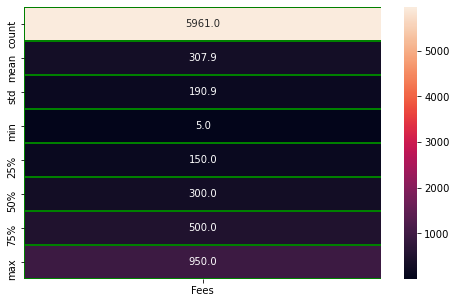

In [81]:
plt.figure(figsize=(8,5))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='green',fmt='0.1f')

In [82]:
df['Rating']=df['Rating'].str.extract('(^\d*)')
df['Experience']=df['Experience'].str.extract('(^\d*)')    

In [83]:
df['Qualification']=df['Qualification'].astype(object,errors='raise')
df['Rating']=df['Rating'].astype(object,errors='raise')

In [84]:
df['Place'] = df['Place'].str.replace('\d+', '')
df['Qualification'] = df['Qualification'].str.replace('\d+', '')
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,BHMS- MD - Homeopathy,24,100,Kakkanad- Ernakulam,Homeopath,100% 16 Feedback Kakkanad- Ernakulam,100
1,BAMS- MD - Ayurveda Medicine,12,98,Whitefield- Bangalore,Ayurveda,98% 76 Feedback Whitefield- Bangalore,350
2,MBBS- MS - Otorhinolaryngology,9,0,Mathikere - BEL- Bangalore,ENT Specialist,Not Applicable,300
3,BSc - Zoology- BAMS,12,0,Bannerghatta Road- Bangalore,Ayurveda,Bannerghatta Road- Bangalore ₹250 Available on...,250
4,BAMS,20,100,Keelkattalai- Chennai,Ayurveda,100% 4 Feedback Keelkattalai- Chennai,250
...,...,...,...,...,...,...,...
5956,MBBS- MS - ENT,19,98,Basavanagudi- Bangalore,ENT Specialist,98% 45 Feedback Basavanagudi- Bangalore,300
5957,MBBS,33,0,Nungambakkam- Chennai,General Medicine,Not Applicable,100
5958,MBBS,41,97,Greater Kailash Part - Delhi,General Medicine,97% 11 Feedback Greater Kailash Part 2- Delhi,600
5959,MBBS- MD - General Medicine,15,90,Vileparle West- Mumbai,General Medicine,General Medical Consultation Viral Fever Treat...,100


In [85]:
# df[['Place1','Place2','Place3']] = df['Place'].str.split("-",expand=True,)
df1=df.drop(['Place','Miscellaneous_Info'],axis=1)
df1.info()
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   object
 2   Rating         5961 non-null   object
 3   Profile        5961 non-null   object
 4   Fees           5961 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 233.0+ KB


,Qualification,Experience,Rating,Profile,Fees
0,BHMS- MD - Homeopathy,24,100,Homeopath,100
1,BAMS- MD - Ayurveda Medicine,12,98,Ayurveda,350
2,MBBS- MS - Otorhinolaryngology,9,0,ENT Specialist,300
3,BSc - Zoology- BAMS,12,0,Ayurveda,250
4,BAMS,20,100,Ayurveda,250
...,...,...,...,...,...
5956,MBBS- MS - ENT,19,98,ENT Specialist,300
5957,MBBS,33,0,General Medicine,100
5958,MBBS,41,97,General Medicine,600
5959,MBBS- MD - General Medicine,15,90,General Medicine,100


# Skewness of Columns

Experience    0.991089
Fees          0.751870
Rating        0.247186
dtype: float64


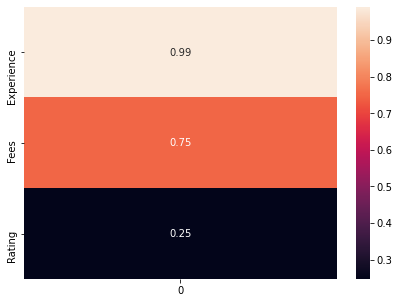

In [86]:
skew=df.skew().sort_values(ascending=False)
print(skew)
skew1=pd.DataFrame(skew)
plt.figure(figsize=(7,5))
sns.heatmap(skew1,annot=True)
plt.show()

Fees    1.0
Name: Fees, dtype: float64


<AxesSubplot:>

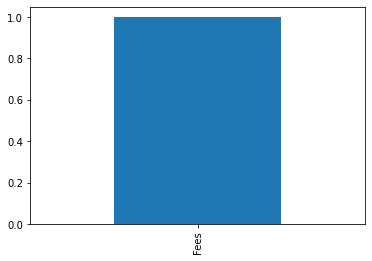

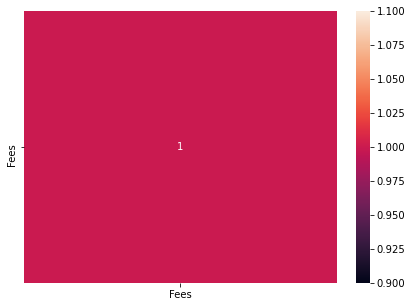

In [87]:
cor=df.corr()['Fees'].sort_values(ascending=False)
print(cor)
cor.plot(kind='bar')
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True)

# Plots and Graphs

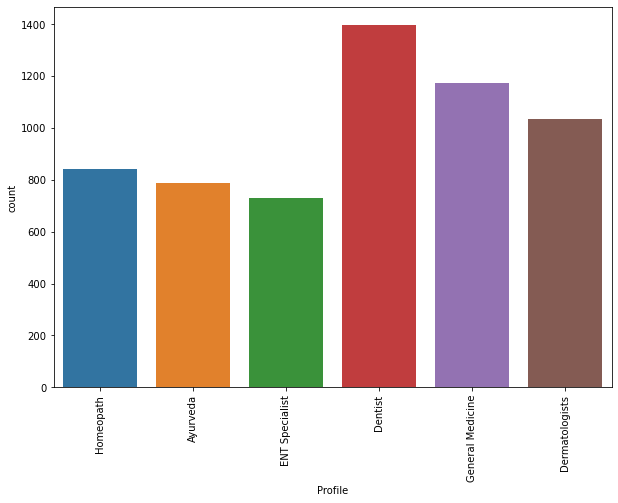

In [88]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot(df['Profile'])
plt.show()

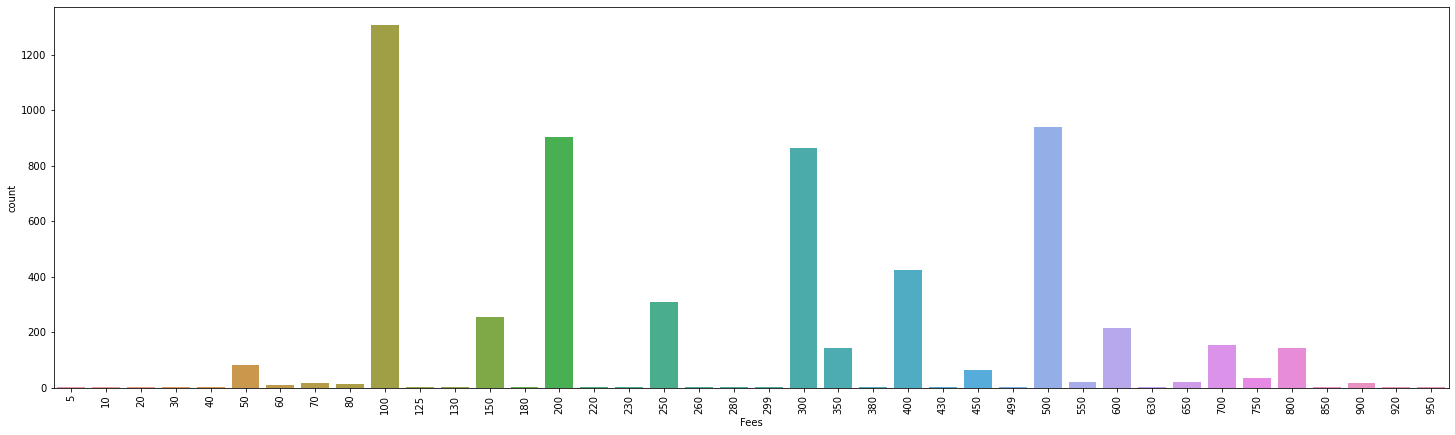

In [89]:
plt.figure(figsize=(25,7))
plt.xticks(rotation=90)
sns.countplot(df['Fees'])
plt.show()

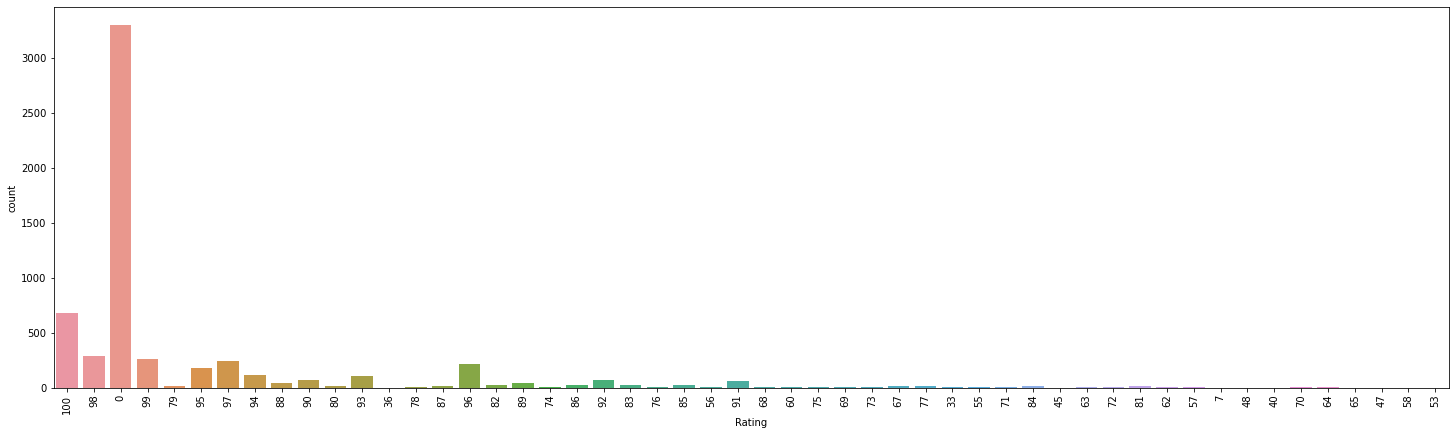

In [90]:
plt.figure(figsize=(25,7))
plt.xticks(rotation=90)
sns.countplot(df['Rating'])
plt.show()

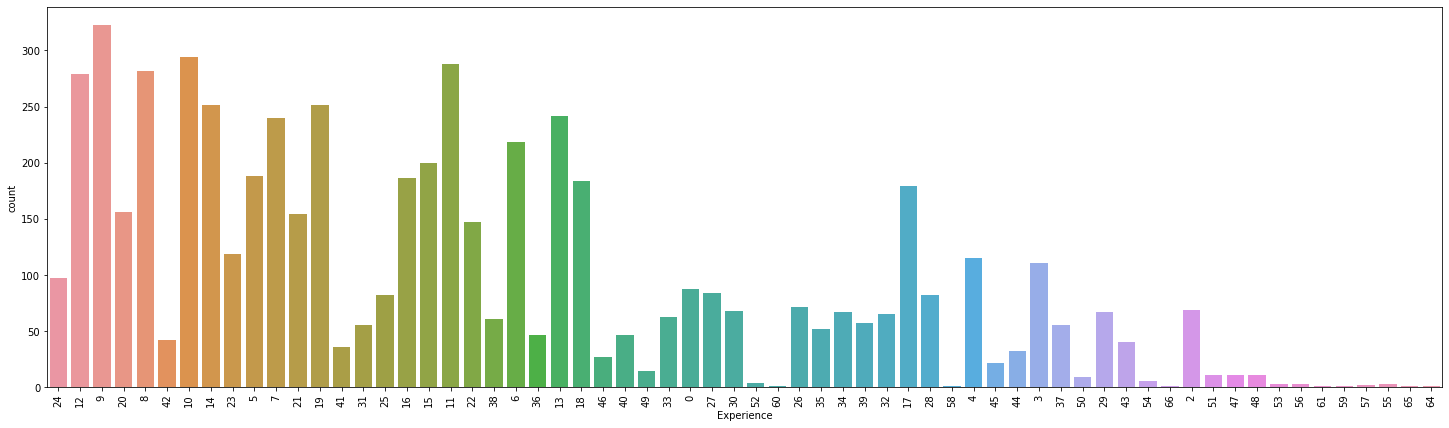

In [91]:
plt.figure(figsize=(25,7))
plt.xticks(rotation=90)
sns.countplot(df['Experience'])
plt.show()

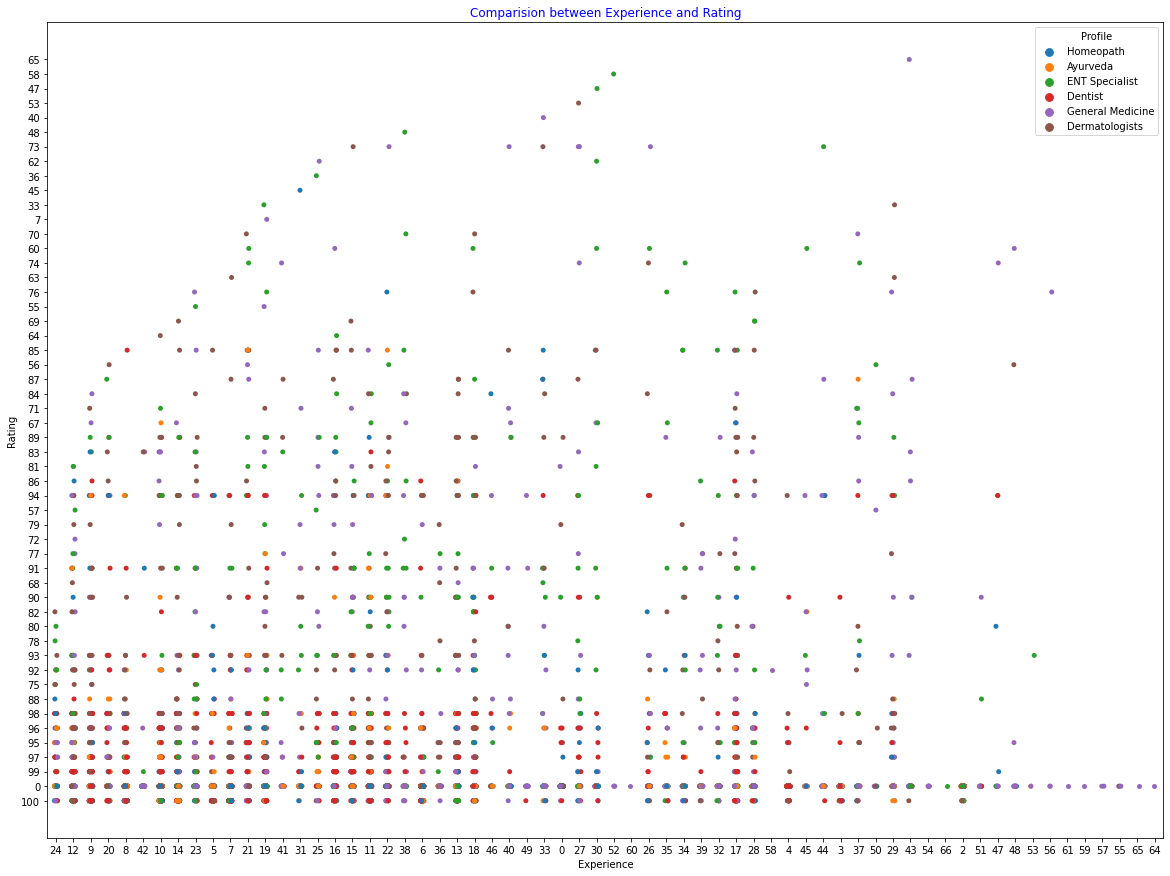

In [92]:
plt.figure(figsize=(20,15))
plt.title('Comparision between Experience and Rating',color='blue')
sns.stripplot(x='Experience',y='Rating',data=df,hue='Profile')
plt.show()

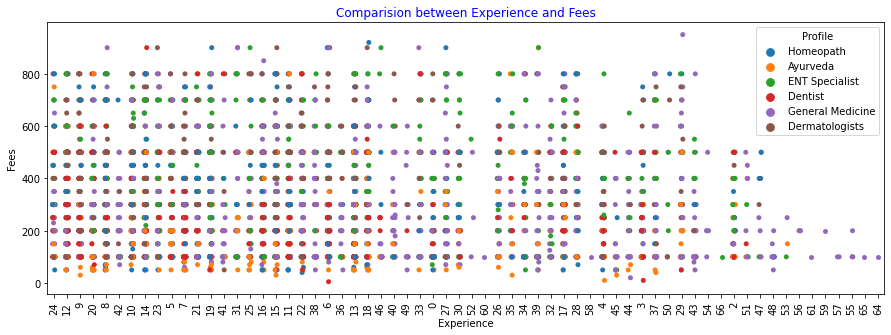

In [93]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 90)
plt.title('Comparision between Experience and Fees',color='blue')
sns.stripplot(x='Experience',y='Fees',data=df,hue='Profile')
plt.show()

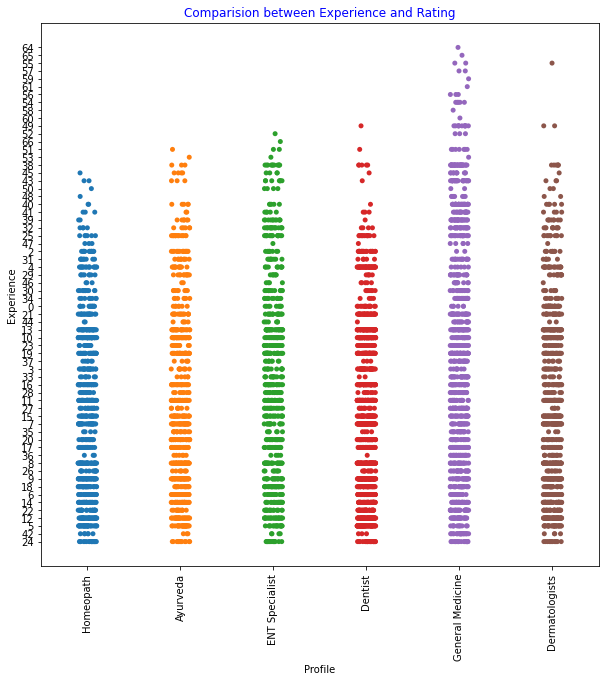

In [94]:
plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
plt.title('Comparision between Experience and Rating',color='blue')
sns.stripplot(x='Profile',y='Experience',data=df)
plt.show()

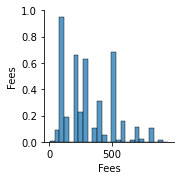

In [95]:
sns.pairplot(df)

<AxesSubplot:>

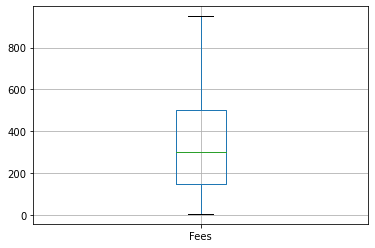

In [96]:
df1.boxplot()

In [97]:
df1

,Qualification,Experience,Rating,Profile,Fees
0,BHMS- MD - Homeopathy,24,100,Homeopath,100
1,BAMS- MD - Ayurveda Medicine,12,98,Ayurveda,350
2,MBBS- MS - Otorhinolaryngology,9,0,ENT Specialist,300
3,BSc - Zoology- BAMS,12,0,Ayurveda,250
4,BAMS,20,100,Ayurveda,250
...,...,...,...,...,...
5956,MBBS- MS - ENT,19,98,ENT Specialist,300
5957,MBBS,33,0,General Medicine,100
5958,MBBS,41,97,General Medicine,600
5959,MBBS- MD - General Medicine,15,90,General Medicine,100


In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
lenc=LabelEncoder()
df1['Qualification']=lenc.fit_transform(df1['Qualification'])
df1['Profile']=lenc.fit_transform(df1['Profile'])
df1   

,Qualification,Experience,Rating,Profile,Fees
0,401,24,100,5,100
1,73,12,98,0,350
2,1135,9,0,3,300
3,464,12,0,0,250
4,10,20,100,0,250
...,...,...,...,...,...
5956,1075,19,98,3,300
5957,596,33,0,4,100
5958,596,41,97,4,600
5959,943,15,90,4,100


In [100]:
x=df1.drop('Fees',axis=1)
y1=df1['Fees'].to_numpy()
y=pd.DataFrame(y1)
print(x.shape,y.shape)

(5961, 4) (5961, 1)


# Linear Regression

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [102]:
lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuarcy is :- {r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is :- 0.08968681121670175
At random state 0, the testing accuarcy is :- 0.12463778568131556


At random state 1,the training accuracy is :- 0.09605887674094293
At random state 1, the testing accuarcy is :- 0.10020261018158139


At random state 2,the training accuracy is :- 0.09766344891680856
At random state 2, the testing accuarcy is :- 0.09329358596625781


At random state 3,the training accuracy is :- 0.10138177600385145
At random state 3, the testing accuarcy is :- 0.07799207033771116


At random state 4,the training accuracy is :- 0.09854120935153743
At random state 4, the testing accuarcy is :- 0.09060441018664023


At random state 5,the training accuracy is :- 0.09576827640979568
At random state 5, the testing accuarcy is :- 0.1019011716257553


At random state 6,the training accuracy is :- 0.09382959881312469
At random state 6, the testing accuarcy is :- 0.10570773612295192


At random state 7,the training accuracy is :- 0.098638690129031

At random state 65,the training accuracy is :- 0.0983486712648356
At random state 65, the testing accuarcy is :- 0.09045369279155102


At random state 66,the training accuracy is :- 0.10148211494734438
At random state 66, the testing accuarcy is :- 0.07823830759620665


At random state 67,the training accuracy is :- 0.09166898943932245
At random state 67, the testing accuarcy is :- 0.11775388334557202


At random state 68,the training accuracy is :- 0.09364844042874709
At random state 68, the testing accuarcy is :- 0.10946114621269754


At random state 69,the training accuracy is :- 0.09382835796505151
At random state 69, the testing accuarcy is :- 0.10908888229235858


At random state 70,the training accuracy is :- 0.10132932491511948
At random state 70, the testing accuarcy is :- 0.07770766105124438


At random state 71,the training accuracy is :- 0.09850135549196404
At random state 71, the testing accuarcy is :- 0.08728555773413049


At random state 72,the training accuracy is :- 0.

# Support Vector Regression

In [104]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
print(x.shape)
print(y.shape)

(5961, 4)
(5961, 1)


In [105]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    print(sv.fit(x_train,y_train))
    print(sv.score(x_train,y_train))

SVR(kernel='linear')
0.06638565822494857
SVR(kernel='poly')
0.01924699424084564
SVR()
0.047244664480399545


In [106]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr.fit(x,y)
y_pred = svr.predict(x)
y_pred

array([ 0.01360027, -0.34201858,  0.09892341, ..., -0.01630037,
        0.35461818, -0.21008672])

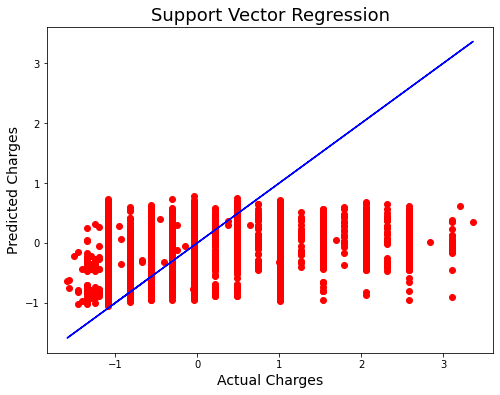

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y,y=y_pred,color='r')
plt.plot(y,y,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

# Decision Tree Regression

In [108]:
from sklearn.tree import DecisionTreeRegressor

In [109]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x)
print("Predicted Fees:",y_pred)

Predicted Fees: [125. 125. 125. ... 400. 125. 125.]


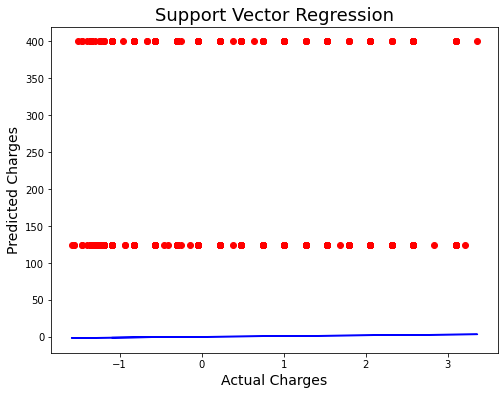

In [110]:
plt.figure(figsize=(8,6))
plt.scatter(x=y,y=y_pred,color='r')
plt.plot(y,y,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

# Cross Validation Score

In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At Cross fold {j} the cv score is {cv_mean}, accuracy score of training is {train_accuracy} and accuracy score of testing is {test_accuracy}')
    print('\n')

At Cross fold 2 the cv score is 0.0963469758185379, accuracy score of training is 0.09856867181602946 and accuracy score of testing is 0.09003932340164778


At Cross fold 3 the cv score is 0.09597833100699944, accuracy score of training is 0.09856867181602946 and accuracy score of testing is 0.09003932340164778


At Cross fold 4 the cv score is 0.09610226884203171, accuracy score of training is 0.09856867181602946 and accuracy score of testing is 0.09003932340164778


At Cross fold 5 the cv score is 0.09503453668548459, accuracy score of training is 0.09856867181602946 and accuracy score of testing is 0.09003932340164778


At Cross fold 6 the cv score is 0.09509643640498565, accuracy score of training is 0.09856867181602946 and accuracy score of testing is 0.09003932340164778


At Cross fold 7 the cv score is 0.09468632613726471, accuracy score of training is 0.09856867181602946 and accuracy score of testing is 0.09003932340164778


At Cross fold 8 the cv score is 0.0955224715984733, a

# Regularisation

In [113]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_) 

{'alpha': 0.0001, 'random_state': 0}


In [120]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.09003933715867296

In [115]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.09468124281885189

# Ensemble Technique

In [117]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [121]:
rf=RandomForestRegressor(criterion='mse',max_features='sqrt')
rf.fit(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2 Score',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

r2 Score 0.4859480508668912
Cross Val Score: -0.9756597272684232


# Conclusion

From the above Model we can see that Random Forest Regressor has the highest Score hence we use Random Forest Regressor Model

# Saving Model

In [125]:
import pickle
filename='rfcmodel.pkl'
pickle.dump(rfc, open(filename,'wb'))

In [ ]:
df_test=pd.DataFrame(r'D:\Data Trained\Evaluation Projects\Doctor Consltant Fees\Final_Test.xlsx',sheet_name='Sheet1')